In [202]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [265]:
#Read csv file and set to Dataframe
file = pd.read_csv('iris.csv', sep=',')
df = pd.DataFrame(file)

In [266]:
#Show first five records
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [267]:
# Show a dataframe which has sepal width greater than 4
df[(df['SepalWidthCm'] > 4)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa


In [268]:
#Show a dataframe which has sepal width greater than 4
df[(df['PetalWidthCm'] > 1)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [269]:
#Retrieve records which have petal width more than 2
df[(df['PetalWidthCm'] > 2)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica
112,113,6.8,3.0,5.5,2.1,Iris-virginica
114,115,5.8,2.8,5.1,2.4,Iris-virginica
115,116,6.4,3.2,5.3,2.3,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica


<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

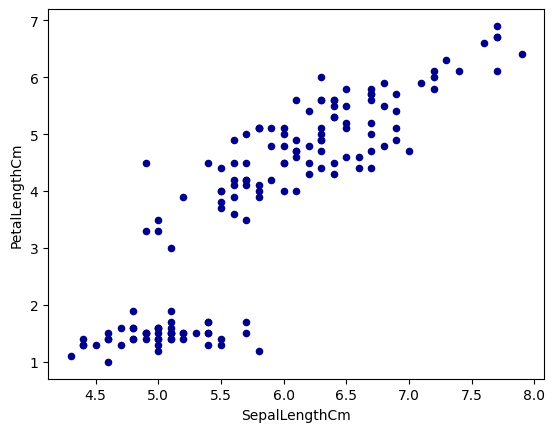

In [270]:
#Relationship between Sepal Length and Petal Length
df.plot.scatter(x='SepalLengthCm', y='PetalLengthCm', c='DarkBlue')

#### In the above graph you can see a clear correlation between Sepal Length and Petal Length. You can identify the possiblity of muliple species within this graph, with a species that has shorter petal length to sepal lenght located in the lower lefthand section of the graph. The following visualization shown below will determine varience in species.

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

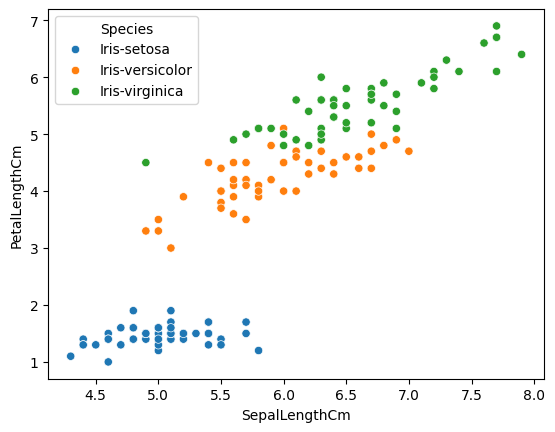

In [271]:
#Added hue for species type for better visibility and understanding
sns.scatterplot(data=df, x='SepalLengthCm', y='PetalLengthCm', hue='Species')

#### As noted above, it is clear that the Setosa species is defined by shorter petal lengths to sepal lenghts as shown in blue. The remains species of Iris show clear relationships between sepal and petal length, as well. 

# Model 1

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

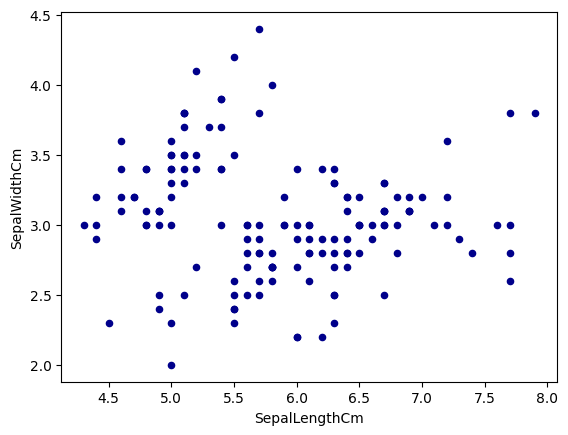

In [272]:
#reference plot for the Model 1 - Linear Regression -
df.plot.scatter(x='SepalLengthCm', y='SepalWidthCm', c='DarkBlue')

#### The above graph shows the relationship between sepal length and sepal width as defined for the first linear regression model. Note that there is not much that defines a relationship between the sepal width and sepal lenght. The scatter plot is quite scattered, and this will cause the linear regression model to return a less defined result.

In [282]:
#Creating objects X and y and setting to independant and dependant variable
y =  df['SepalLengthCm']
X = df['SepalWidthCm']

In [283]:
#obtaining training and test data for analysis using 30% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [255]:
#printing first five records
X_train.head()

60     2.0
116    3.0
144    3.3
119    2.2
108    2.5
Name: SepalWidthCm, dtype: float64

In [256]:
#printing first five records
X_test.head()

114    2.8
62     2.2
33     4.2
107    2.9
7      3.4
Name: SepalWidthCm, dtype: float64

In [257]:
#printing first five records
y_train.head()

60     5.0
116    6.5
144    6.7
119    6.0
108    6.7
Name: SepalLengthCm, dtype: float64

In [258]:
#printing first five records
y_test.head()

114    5.8
62     6.0
33     5.5
107    7.3
7      5.0
Name: SepalLengthCm, dtype: float64

In [284]:
#reshaping arrays to match with dependant variable
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [285]:
#assigning memory from function and assign to object
lr = LinearRegression()

In [286]:
#fitting training set into method
lr.fit(X_train, y_train)  

LinearRegression()

In [287]:
#using predict method to predict trends in data
y_pred = lr.predict(X_train)

In [261]:
#printing values of test selection
y_train

60     5.0
116    6.5
144    6.7
119    6.0
108    6.7
      ... 
9      4.9
103    6.3
67     5.8
117    7.7
47     4.6
Name: SepalLengthCm, Length: 105, dtype: float64

In [262]:
#printing values from prediction
y_pred

array([5.11807689, 6.75899755, 6.63164129, 6.06039708, 6.66556899,
       5.68133443, 6.88039309, 6.47458447, 5.53973841, 6.10375265,
       6.52587849, 5.73482634, 5.98311381, 6.54561465, 6.39273346,
       6.38572366, 4.9142938 , 6.18948691, 5.90553816, 5.57417865,
       5.62234612, 6.33924155, 7.27264642, 5.22613732, 4.53332562,
       6.3431248 , 6.16777302, 5.18544397, 5.5437696 , 6.56657183,
       4.83747485, 6.45172177, 4.98996393, 4.88708352, 5.67630236,
       7.1332483 , 6.03509232, 4.76378246, 6.86256245, 6.70267146,
       6.71783988, 6.50255146, 5.36773334, 5.10862503, 6.44546867,
       6.90325579, 4.09771672, 6.60176878, 4.69587883, 5.91521019,
       6.5432448 , 4.74861404, 5.08454129, 7.12526163, 4.95186059,
       4.61905989, 5.37352211, 5.49279197, 6.85630935, 7.40029506,
       5.01976422, 4.90537848, 4.95498714, 6.20077207, 6.18560366,
       4.6717951 , 4.91695602, 6.11191126, 4.89599883, 7.23583633,
       5.22354731, 7.83277741, 6.25038074, 5.55314925, 6.22126

<function matplotlib.pyplot.show(close=None, block=None)>

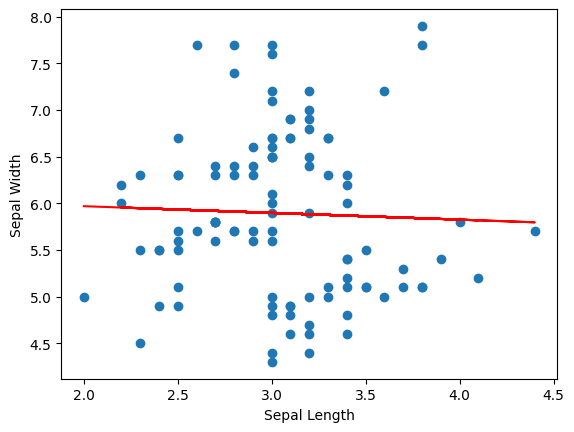

In [288]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color='red')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show

#### As previously mentioned, the relationship between sepal width and sepal length is not well defined, so this model's graph is not able to show a clear prediction.

# Model 2

In [289]:
#setting a single dependant and multiple independant variables
y = df['SepalLengthCm']
X = df[['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [290]:
#splitting variables into test and train sets using 30% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [292]:
#assigning memory from function and assign to object
lr = LinearRegression()

In [293]:
#fitting training data into method
lr.fit(X_train, y_train)  

LinearRegression()

In [294]:
#use predict method to predict trends
y_pred = lr.predict(X_train)

<function matplotlib.pyplot.show(close=None, block=None)>

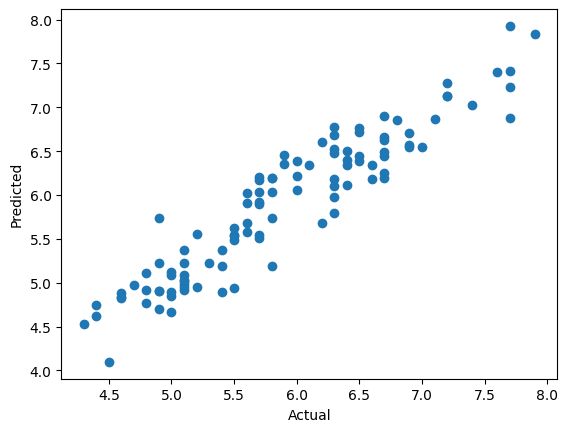

In [297]:
plt.scatter(y_train, y_pred)
#plt.plot(X_train, y_pred, color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show